# Projeto de Machine Learning de Classificação
## O projeto consiste em desenvolver o modelo de Machine Learning de Classificação com os melhores scores possíveis
### Grupo: Cristoferson, Jean, João Pedro, Lucas, Natalie

In [72]:
import pandas as pd
import numpy as np

In [73]:
df = pd.read_pickle('data_insurance.pkl')
df

,upper_age,lower_age,reco_policy_premium,city_code,accomodation_type,reco_insurance_type,is_spouse,health_indicator,holding_policy_duration,holding_policy_type,used_plan
0,52,52,16200.0,C2,Owned,Individual,No,X4,6.0,4.0,0
1,67,67,16900.0,C17,Rented,Individual,No,X1,7.0,3.0,1
2,75,75,25668.0,C10,Owned,Individual,No,X3,3.0,1.0,0
3,60,57,17586.8,C26,Owned,Joint,Yes,X1,14+,1.0,0
4,35,35,12762.0,C12,Rented,Individual,No,X1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
23543,50,50,10908.0,C2,Owned,Individual,No,X1,5.0,3.0,0
23544,64,63,29856.0,C2,Owned,Joint,Yes,X1,12.0,4.0,0
23545,75,75,23028.0,C7,Owned,Individual,No,X1,12.0,2.0,0
23546,38,35,11769.6,C13,Owned,Joint,Yes,X4,5.0,2.0,0


In [74]:
df.used_plan.value_counts()

0    17848
1     5700
Name: used_plan, dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23548 entries, 0 to 23547
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   upper_age                23548 non-null  int64  
 1   lower_age                23548 non-null  int64  
 2   reco_policy_premium      23548 non-null  float64
 3   city_code                23548 non-null  object 
 4   accomodation_type        23548 non-null  object 
 5   reco_insurance_type      23548 non-null  object 
 6   is_spouse                23548 non-null  object 
 7   health_indicator         23548 non-null  object 
 8   holding_policy_duration  23548 non-null  object 
 9   holding_policy_type      23548 non-null  float64
 10  used_plan                23548 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 2.0+ MB


In [146]:
dados_posteriores = df.sample(frac=.01)
dados_posteriores

,upper_age,lower_age,reco_policy_premium,city_code,accomodation_type,reco_insurance_type,is_spouse,health_indicator,holding_policy_duration,holding_policy_type,used_plan
6881,40,40,11616.0,3.0,1,1,1,1,2.0,1.0,0
10901,41,41,10864.0,2.0,1,1,1,1,7.0,4.0,0
14787,65,65,18088.0,1.0,1,1,1,2,4.0,4.0,1
5118,46,46,13620.0,2.0,2,1,1,2,3.0,1.0,0
23386,62,56,20081.6,1.0,1,2,2,2,8.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
21256,61,61,14190.0,2.0,2,1,1,2,14,4.0,0
11815,24,24,5768.0,2.0,2,1,1,3,2.0,3.0,0
15378,60,60,15932.0,1.0,1,1,1,3,5.0,1.0,0
21620,62,62,18180.0,3.0,1,1,1,2,5.0,4.0,1


### Convertendo a coluna city_code para números

In [76]:
city_code_order = ['C1', 'C2', 'C3', ...]
city_code_mapping = {code: i+1 for i, code in enumerate(city_code_order)}
df['city_code'] = df['city_code'].map(city_code_mapping)

print(df.head())

   upper_age  lower_age  reco_policy_premium  city_code accomodation_type  \
0         52         52              16200.0        2.0             Owned   
1         67         67              16900.0        NaN            Rented   
2         75         75              25668.0        NaN             Owned   
3         60         57              17586.8        NaN             Owned   
4         35         35              12762.0        NaN            Rented   

  reco_insurance_type is_spouse health_indicator holding_policy_duration  \
0          Individual        No               X4                     6.0   
1          Individual        No               X1                     7.0   
2          Individual        No               X3                     3.0   
3               Joint       Yes               X1                     14+   
4          Individual        No               X1                     3.0   

   holding_policy_type  used_plan  
0                  4.0          0  
1       

### Convertendo a coluna reco_insurance_type para números

In [77]:
reco_insurance_type_order = ['Individual', 'Joint']
reco_insurance_type_mapping = {type: i+1 for i, type in enumerate(reco_insurance_type_order)}
df['reco_insurance_type'] = df['reco_insurance_type'].map(reco_insurance_type_mapping)

print(df.head())

   upper_age  lower_age  reco_policy_premium  city_code accomodation_type  \
0         52         52              16200.0        2.0             Owned   
1         67         67              16900.0        NaN            Rented   
2         75         75              25668.0        NaN             Owned   
3         60         57              17586.8        NaN             Owned   
4         35         35              12762.0        NaN            Rented   

   reco_insurance_type is_spouse health_indicator holding_policy_duration  \
0                    1        No               X4                     6.0   
1                    1        No               X1                     7.0   
2                    1        No               X3                     3.0   
3                    2       Yes               X1                     14+   
4                    1        No               X1                     3.0   

   holding_policy_type  used_plan  
0                  4.0          0  
1 

### Convertendo a coluna accomodation_type para números

In [78]:
accomodation_type_order = ['Owned', 'Rented']
accomodation_type_mapping = {type: i+1 for i, type in enumerate(accomodation_type_order)}
df['accomodation_type'] = df['accomodation_type'].map(accomodation_type_mapping)

print(df.head())

   upper_age  lower_age  reco_policy_premium  city_code  accomodation_type  \
0         52         52              16200.0        2.0                  1   
1         67         67              16900.0        NaN                  2   
2         75         75              25668.0        NaN                  1   
3         60         57              17586.8        NaN                  1   
4         35         35              12762.0        NaN                  2   

   reco_insurance_type is_spouse health_indicator holding_policy_duration  \
0                    1        No               X4                     6.0   
1                    1        No               X1                     7.0   
2                    1        No               X3                     3.0   
3                    2       Yes               X1                     14+   
4                    1        No               X1                     3.0   

   holding_policy_type  used_plan  
0                  4.0          

### Convertendo a coluna is_spouse para números

In [79]:
is_spouse_order = ['No', 'Yes']
is_spouse_mapping = {value: i+1 for i, value in enumerate(is_spouse_order)}
df['is_spouse'] = df['is_spouse'].map(is_spouse_mapping)

print(df.head())

   upper_age  lower_age  reco_policy_premium  city_code  accomodation_type  \
0         52         52              16200.0        2.0                  1   
1         67         67              16900.0        NaN                  2   
2         75         75              25668.0        NaN                  1   
3         60         57              17586.8        NaN                  1   
4         35         35              12762.0        NaN                  2   

   reco_insurance_type  is_spouse health_indicator holding_policy_duration  \
0                    1          1               X4                     6.0   
1                    1          1               X1                     7.0   
2                    1          1               X3                     3.0   
3                    2          2               X1                     14+   
4                    1          1               X1                     3.0   

   holding_policy_type  used_plan  
0                  4.0    

### Convertendo a coluna health_indicator para números

In [80]:
health_indicator_order = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']
health_indicator_mapping = {indicator: i+1 for i, indicator in enumerate(health_indicator_order)}
df['health_indicator'] = df['health_indicator'].map(health_indicator_mapping)

print(df.head())

   upper_age  lower_age  reco_policy_premium  city_code  accomodation_type  \
0         52         52              16200.0        2.0                  1   
1         67         67              16900.0        NaN                  2   
2         75         75              25668.0        NaN                  1   
3         60         57              17586.8        NaN                  1   
4         35         35              12762.0        NaN                  2   

   reco_insurance_type  is_spouse  health_indicator holding_policy_duration  \
0                    1          1                 4                     6.0   
1                    1          1                 1                     7.0   
2                    1          1                 3                     3.0   
3                    2          2                 1                     14+   
4                    1          1                 1                     3.0   

   holding_policy_type  used_plan  
0                  4

### Substituindo "14+" por "14" na coluna "holding_policy_duration"

In [82]:
df['holding_policy_duration'] = df['holding_policy_duration'].replace('14+', '14')

print(df.head())

   upper_age  lower_age  reco_policy_premium  city_code  accomodation_type  \
0         52         52              16200.0        2.0                  1   
1         67         67              16900.0        NaN                  2   
2         75         75              25668.0        NaN                  1   
3         60         57              17586.8        NaN                  1   
4         35         35              12762.0        NaN                  2   

   reco_insurance_type  is_spouse  health_indicator holding_policy_duration  \
0                    1          1                 4                     6.0   
1                    1          1                 1                     7.0   
2                    1          1                 3                     3.0   
3                    2          2                 1                      14   
4                    1          1                 1                     3.0   

   holding_policy_type  used_plan  
0                  4

### Verificando e revomendo valores NaN na tabela

In [83]:
print(df.isnull().sum())
df = df.dropna()

print(df.head())

upper_age                      0
lower_age                      0
reco_policy_premium            0
city_code                  13102
accomodation_type              0
reco_insurance_type            0
is_spouse                      0
health_indicator               0
holding_policy_duration        0
holding_policy_type            0
used_plan                      0
dtype: int64
    upper_age  lower_age  reco_policy_premium  city_code  accomodation_type  \
0          52         52              16200.0        2.0                  1   
5          75         75              21964.0        2.0                  1   
7          75         70              29083.6        1.0                  1   
10         53         53              15704.0        1.0                  1   
11         43         35              11781.0        1.0                  1   

    reco_insurance_type  is_spouse  health_indicator holding_policy_duration  \
0                     1          1                 4                 

xx = df.iloc[:,:10]
yy = df.iloc[:,10]

### Realizando o balançeamento

In [85]:
from sklearn.model_selection import train_test_split
x_treino_original, x_teste, y_treino_original, y_teste = train_test_split(xx,yy,test_size=0.2,random_state=0)

In [86]:
#para sem balanceamento: 0
#para com balanceamento: 1
decisao = 1
if decisao == 0:
    x_treino = x_treino_original
    y_treino = y_treino_original
elif decisao == 1:
    from imblearn.combine import SMOTEENN
    smt = SMOTEENN()
    x_treino,y_treino =  smt.fit_resample(x_treino_original,y_treino_original)

In [87]:
y_treino.value_counts()

1    2859
0    1998
Name: used_plan, dtype: int64

## Pré-treino de algoritmos de ML

### Algoritmo Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_treino,y_treino)
rf_y_pred = rf.predict(x_teste)

In [89]:
print(y_teste[:10].values)
print(rf_y_pred[:10])

[0 0 0 0 0 0 0 0 1 1]
[0 0 0 1 0 1 0 1 0 1]


In [90]:
print(y_teste[-10:].values)
print(rf_y_pred[-10:])

[0 1 0 1 0 0 1 0 0 1]
[1 1 0 1 0 0 1 0 0 0]


### Algoritmo Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_treino,y_treino)
nb_y_pred = nb.predict(x_teste)

In [92]:
print(y_teste[:10].values)
print(nb_y_pred[:10])

[0 0 0 0 0 0 0 0 1 1]
[0 0 1 1 1 1 1 1 1 1]


In [93]:
print(y_teste[-10:].values)
print(nb_y_pred[-10:])

[0 1 0 1 0 0 1 0 0 1]
[1 1 0 1 1 0 1 0 1 1]


### Algoritmo KNN

In [103]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr.fit(x_treino,y_treino)
tr_y_pred = tr.predict(x_teste)

In [104]:
print(y_teste[:10].values)
print(tr_y_pred[:10])

[0 0 0 0 0 0 0 0 1 1]
[0 0 1 0 0 1 0 0 0 1]


In [105]:
print(y_teste[-10:].values)
print(tr_y_pred[-10:])

[0 1 0 1 0 0 1 0 0 1]
[0 0 1 0 0 1 0 1 0 1]


## Métricas dos modelos de ML (Classificação)

### Matriz de confusão

In [97]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Definindo função para plotar matriz de confusão a partir de qualquer y_teste e y_pred

In [99]:
def matriz_confusao(y_teste,y_pred,nome):
    cm = confusion_matrix(y_teste,y_pred)
    plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
    plt.title('Matriz de confusão do algoritmo '+nome)
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Negativo', 'Positivo'])
    plt.yticks(tick_marks, ['Negativo', 'Positivo'])
    plt.xlabel('Previsão')
    plt.ylabel('Valor real')
    thresh = cm.max() / 2.
    for i, j in ((i, j) for i in range(len(cm)) for j in range(len(cm[0]))):
        plt.text(j, i, cm[i][j], ha='center', va='center', color='white' if cm[i][j] > thresh else 'black')
    plt.savefig('Matriz_Confusao_Algoritmo_'+nome)
    plt.show()
    

#### Matriz de confusão Naive Bayes

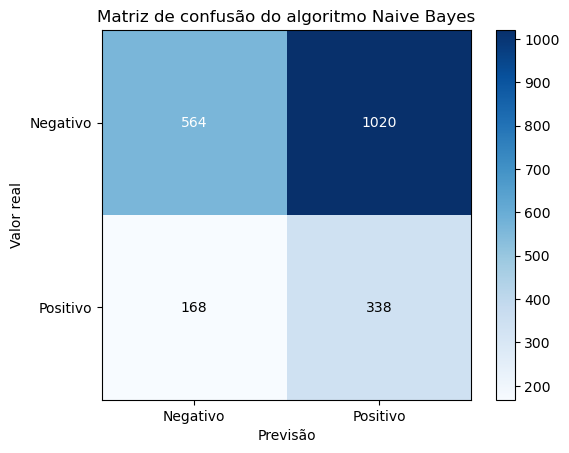

In [100]:
matriz_confusao(y_teste,nb_y_pred,'Naive Bayes')

#### (...) Matriz de confusão Random Forest

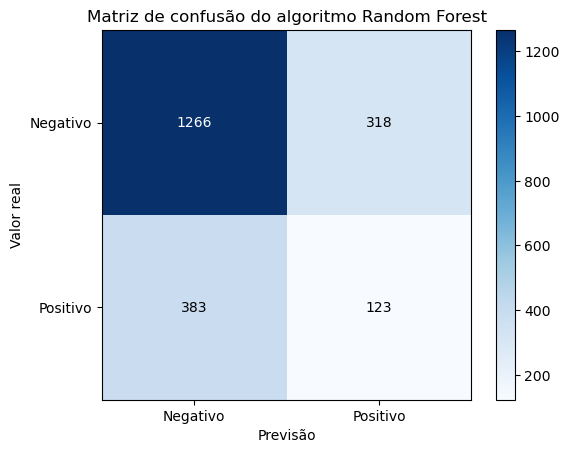

In [102]:
matriz_confusao(y_teste,rf_y_pred,'Random Forest')

#### Matriz de confusão do Decision Tree

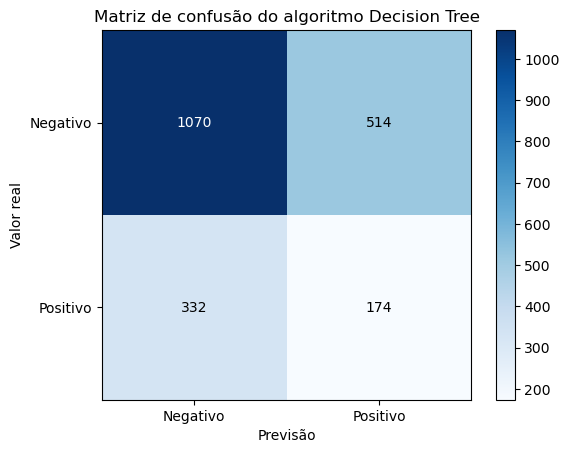

In [106]:
matriz_confusao(y_teste,tr_y_pred,'Decision Tree')

### Accuracy Score

In [107]:
from sklearn.metrics import accuracy_score
acc_naive_bayes = accuracy_score(y_teste,nb_y_pred)
acc_decision_tree = accuracy_score(y_teste,tr_y_pred)
acc_random_forest = accuracy_score(y_teste,rf_y_pred)

In [108]:
print('Accuracy score Naive Bayes: '+ str(acc_naive_bayes))
print('Accuracy score Decision Tree: '+ str(acc_decision_tree))
print('Accuracy score Random Forest: '+ str(acc_random_forest))

Accuracy score Naive Bayes: 0.43157894736842106
Accuracy score Decision Tree: 0.5952153110047846
Accuracy score Random Forest: 0.6645933014354067


### Verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos

In [109]:
def analise_resultados_classificacao(y_true, y_pred,nome):
    TP = sum((y_true == 1) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FP = sum((y_true == 0) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))
    print("Resultados da análise do algoritmo "+nome)
    print("Verdadeiros Positivos:", TP)
    print("Verdadeiros Negativos:", TN)
    print("Falsos Positivos:", FP)
    print("Falsos Negativos:", FN)

#### Análise Naive Bayes


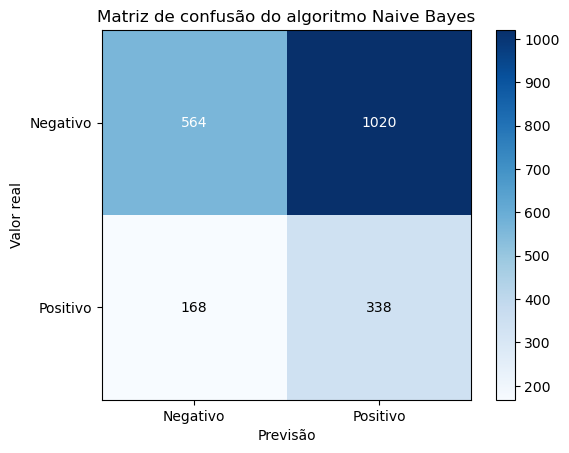

In [110]:
matriz_confusao(y_teste,nb_y_pred,'Naive Bayes')

In [112]:
analise_resultados_classificacao(y_teste,nb_y_pred,'Naive Bayes')

Resultados da análise do algoritmo Naive Bayes
Verdadeiros Positivos: 338
Verdadeiros Negativos: 564
Falsos Positivos: 1020
Falsos Negativos: 168


In [113]:
acc_naive_bayes

0.43157894736842106

#### Análise Random Forest


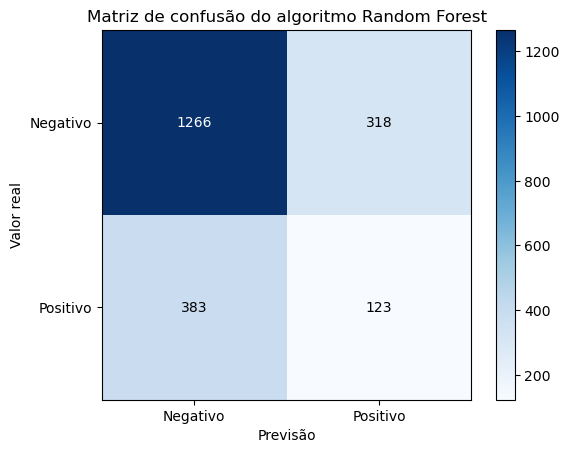

In [114]:
matriz_confusao(y_teste,rf_y_pred,'Random Forest')

In [115]:
analise_resultados_classificacao(y_teste,rf_y_pred,'Random Forest')

Resultados da análise do algoritmo Random Forest
Verdadeiros Positivos: 123
Verdadeiros Negativos: 1266
Falsos Positivos: 318
Falsos Negativos: 383


In [116]:
acc_random_forest

0.6645933014354067

### Precision e Recall
Precisão e sensibilidade do modelo


In [131]:
from sklearn.metrics import precision_score,recall_score
pre_naive_bayes = precision_score(y_teste,nb_y_pred)
pre_random_forest = precision_score(y_teste,rf_y_pred)
rec_naive_bayes = recall_score(y_teste,nb_y_pred)
rec_random_forest = recall_score(y_teste,rf_y_pred)

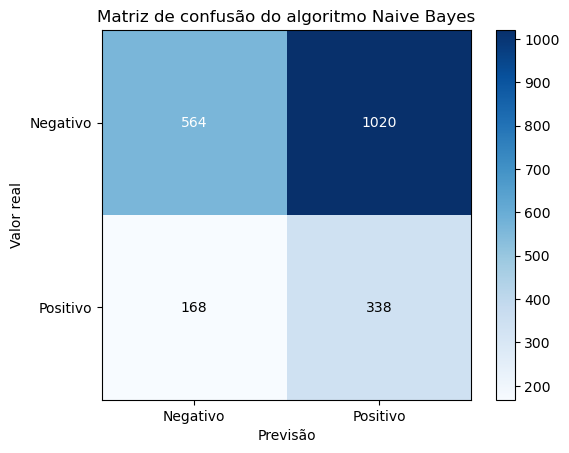

In [132]:
matriz_confusao(y_teste,nb_y_pred,"Naive Bayes")

In [119]:
print("Precisão do Naive Bayes: "+str(pre_naive_bayes))
print("Sensibilidade Naive Bayes: "+str(rec_naive_bayes))

Precisão do Naive Bayes: 0.24889543446244478
Sensibilidade Naive Bayes: 0.6679841897233202


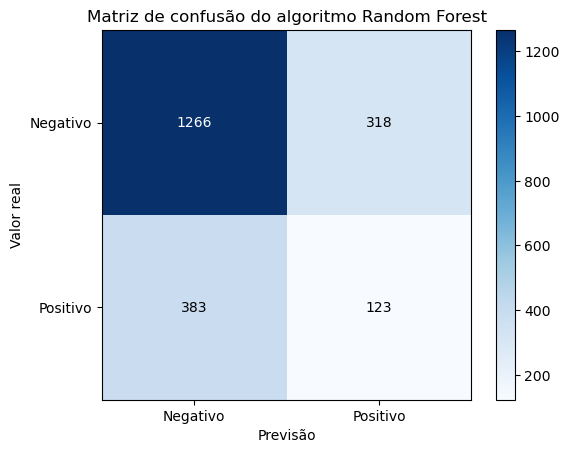

In [120]:
matriz_confusao(y_teste,rf_y_pred,"Random Forest")

In [121]:
print("Precisão do Random Forest: "+str(pre_random_forest))
print("Sensibilidade Random Forest: "+str(rec_random_forest))

Precisão do Random Forest: 0.2789115646258503
Sensibilidade Random Forest: 0.24308300395256918


### F1 Score
Balanceamento entre Precision e Recall

In [122]:
from sklearn.metrics import f1_score

In [123]:
f1_naive_bayes = f1_score(y_teste,nb_y_pred)
f1_random_forest = f1_score(y_teste,rf_y_pred)

In [124]:
print('F1 Score Naive Bayes: '+str(f1_naive_bayes))
print('F1 Score Random Forest: '+str(f1_random_forest))

F1 Score Naive Bayes: 0.3626609442060086
F1 Score Random Forest: 0.25976768743400214


### Definir tabela de métricas e função que alimenta a tabela

In [126]:
# Tabela:
metricas = pd.DataFrame(columns=[
    'Nome algoritmo',
    'Acurácia',
    'Precisão',
    'Sensibilidade',
    'F1 Score'
])
# Função que alimenta a tabela:
def adiciona_metricas(tabela,y_teste,y_pred,nome_algoritmo):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    acuracia = accuracy_score(y_teste,y_pred)
    precisao = precision_score(y_teste,y_pred)
    sensibilidade = recall_score(y_teste,y_pred)
    f1 = f1_score(y_teste,y_pred)
    dados = [nome_algoritmo,acuracia,precisao,sensibilidade,f1]
    dados = pd.Series(dados,index = tabela.columns)
    tabela.loc[len(tabela)] = dados
    return tabela


In [127]:
adiciona_metricas(metricas,y_teste,nb_y_pred,"Naive Bayes")
adiciona_metricas(metricas,y_teste,tr_y_pred,"Decision Tree")
adiciona_metricas(metricas,y_teste,rf_y_pred,"RandomForestClassifier")

,Nome algoritmo,Acurácia,Precisão,Sensibilidade,F1 Score
0,Naive Bayes,0.431579,0.248895,0.667984,0.362661
1,Decision Tree,0.595215,0.252907,0.343874,0.291457
2,RandomForestClassifier,0.664593,0.278912,0.243083,0.259768


In [128]:
adiciona_metricas(metricas,y_teste,nb_y_pred,"Naive Bayes - Base balanceada")
adiciona_metricas(metricas,y_teste,tr_y_pred,"Decision Tree - Base balanceada")
adiciona_metricas(metricas,y_teste,rf_y_pred,"RandomForestClassifier - Base balanceada")

,Nome algoritmo,Acurácia,Precisão,Sensibilidade,F1 Score
0,Naive Bayes,0.431579,0.248895,0.667984,0.362661
1,Decision Tree,0.595215,0.252907,0.343874,0.291457
2,RandomForestClassifier,0.664593,0.278912,0.243083,0.259768
3,Naive Bayes - Base balanceada,0.431579,0.248895,0.667984,0.362661
4,Decision Tree - Base balanceada,0.595215,0.252907,0.343874,0.291457
5,RandomForestClassifier - Base balanceada,0.664593,0.278912,0.243083,0.259768


In [129]:
metricas.sort_values(by='Nome algoritmo')

,Nome algoritmo,Acurácia,Precisão,Sensibilidade,F1 Score
1,Decision Tree,0.595215,0.252907,0.343874,0.291457
4,Decision Tree - Base balanceada,0.595215,0.252907,0.343874,0.291457
0,Naive Bayes,0.431579,0.248895,0.667984,0.362661
3,Naive Bayes - Base balanceada,0.431579,0.248895,0.667984,0.362661
2,RandomForestClassifier,0.664593,0.278912,0.243083,0.259768
5,RandomForestClassifier - Base balanceada,0.664593,0.278912,0.243083,0.259768


In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
preprocessamento_x = ColumnTransformer([
    ('used_plan',OneHotEncoder(),[0]),
    ('valores_numericos',MinMaxScaler(),slice(1,None))
])

In [140]:

pipeline = Pipeline([
    ('processador_x', preprocessamento_x),
    ('classificador',RandomForestClassifier())
])

In [142]:
pipeline.fit(x_treino_original,y_treino_original)

Pipeline(steps=[('processador_x',
                 ColumnTransformer(transformers=[('used_plan', OneHotEncoder(),
                                                  [0]),
                                                 ('valores_numericos',
                                                  MinMaxScaler(),
                                                  slice(1, None, None))])),
                ('classificador', RandomForestClassifier())])

In [143]:
dados_y_previstos = pipeline.predict(x_treino_original)

In [144]:
modelo_finalizado = Pipeline([
    ('processador_x', preprocessamento_x),
    ('classificador',RandomForestClassifier())
])
modelo_finalizado.fit(xx,yy)

Pipeline(steps=[('processador_x',
                 ColumnTransformer(transformers=[('used_plan', OneHotEncoder(),
                                                  [0]),
                                                 ('valores_numericos',
                                                  MinMaxScaler(),
                                                  slice(1, None, None))])),
                ('classificador', RandomForestClassifier())])

In [147]:
dados_amostra = dados_posteriores.sample(1)
dados_amostra

,upper_age,lower_age,reco_policy_premium,city_code,accomodation_type,reco_insurance_type,is_spouse,health_indicator,holding_policy_duration,holding_policy_type,used_plan
14949,69,66,28672.0,1.0,1,2,2,2,14,2.0,0


In [150]:
dados_amostra_x = dados_amostra.iloc[:,:10].values
dados_amostra_x

array([[69, 66, 28672.0, 1.0, 1, 2, 2, 2, '14', 2.0]], dtype=object)

In [151]:
modelo_finalizado.predict(dados_amostra_x)

C:\Users\luuu_\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\luuu_\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [152]:
import pickle
with open('modelo_finalizado.pkl','wb') as file:
    pickle.dump(modelo_finalizado,file)

In [153]:
import pickle
with open('modelo_finalizado.pkl', 'rb') as file:
    modelo_carregado = pickle.load(file)

In [156]:
dados_amostra = dados_posteriores.sample(1)
dados_amostra_x = dados_amostra.iloc[:,:10].values
dados_amostra_x

array([[75, 73, 28044.8, 1.0, 1, 2, 1, 3, '14', 3.0]], dtype=object)

In [157]:
modelo_carregado.predict(dados_amostra_x)

C:\Users\luuu_\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\luuu_\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [158]:
dados_amostra

,upper_age,lower_age,reco_policy_premium,city_code,accomodation_type,reco_insurance_type,is_spouse,health_indicator,holding_policy_duration,holding_policy_type,used_plan
16262,75,73,28044.8,1.0,1,2,1,3,14,3.0,0
